<a href="https://colab.research.google.com/github/gorapadakpadak/deeplearning_final/blob/main/%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

with Dropout

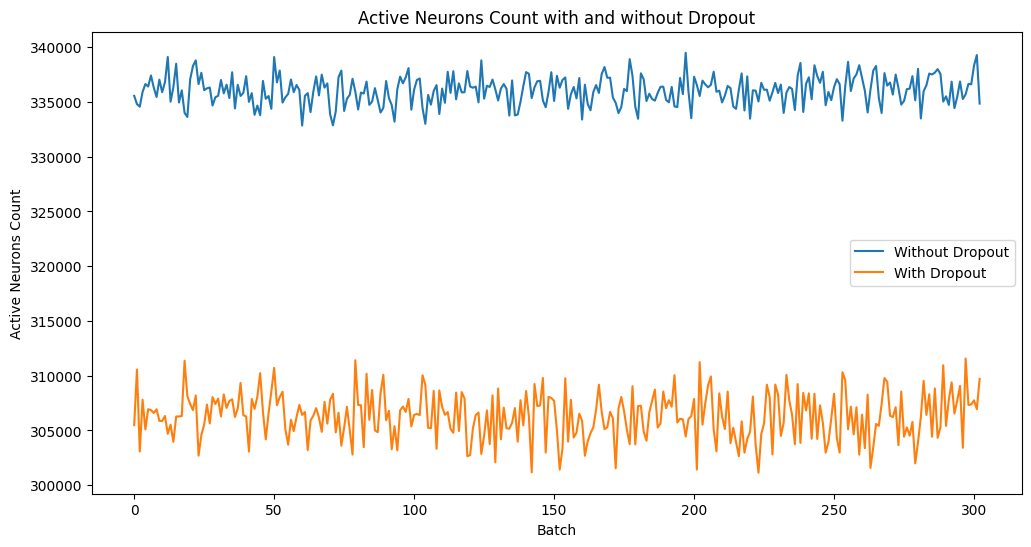

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self, dropout=False):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25) if dropout else nn.Identity()
        self.dropout2 = nn.Dropout2d(0.5) if dropout else nn.Identity()
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = dropout

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        active_neurons = (x != 0).sum().item()  # Always calculate active neurons here
        if self.dropout:
            x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        active_neurons += (x != 0).sum().item()  # Add to active neurons count after relu
        if self.dropout:
            x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        self.active_neurons = active_neurons  # Update active_neurons count here
        return output

def visualize_activation(net):
    # Visualize activation for a single batch
    data_iter = iter(trainloader)
    images, labels = next(data_iter)  # Use next(data_iter) instead of data_iter.next()

    # Get activation counts
    net(images)
    return net.active_neurons

# Train and visualize activations without dropout
net_no_dropout = Net(dropout=False)
neuron_counts_no_dropout = []
for epoch in range(3):  # Train for a few epochs to gather data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = net_no_dropout(inputs)
        neuron_counts_no_dropout.append(visualize_activation(net_no_dropout))
        if i == 100:  # Only visualize the first 100 batches for simplicity
            break

# Train and visualize activations with dropout
net_with_dropout = Net(dropout=True)
neuron_counts_with_dropout = []
for epoch in range(3):  # Train for a few epochs to gather data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = net_with_dropout(inputs)
        neuron_counts_with_dropout.append(visualize_activation(net_with_dropout))
        if i == 100:  # Only visualize the first 100 batches for simplicity
            break

# Plotting the neuron activation counts
plt.figure(figsize=(12, 6))
plt.plot(neuron_counts_no_dropout, label='Without Dropout')
plt.plot(neuron_counts_with_dropout, label='With Dropout')
plt.xlabel('Batch')
plt.ylabel('Active Neurons Count')
plt.legend()
plt.title('Active Neurons Count with and without Dropout')
plt.show()


Epoch 1, Loss: 0.142, Accuracy: 95.79%
Epoch 2, Loss: 0.041, Accuracy: 98.76%
Epoch 3, Loss: 0.026, Accuracy: 99.16%
Epoch 4, Loss: 0.018, Accuracy: 99.42%
Epoch 5, Loss: 0.014, Accuracy: 99.58%
Epoch 6, Loss: 0.008, Accuracy: 99.72%
Epoch 7, Loss: 0.009, Accuracy: 99.70%
Epoch 8, Loss: 0.008, Accuracy: 99.74%
Epoch 9, Loss: 0.006, Accuracy: 99.81%
Epoch 10, Loss: 0.005, Accuracy: 99.84%
Accuracy of the network without dropout on the 10,000 test images: 98.71%
Epoch 1, Loss: 0.236, Accuracy: 92.79%
Epoch 2, Loss: 0.100, Accuracy: 97.05%
Epoch 3, Loss: 0.078, Accuracy: 97.71%
Epoch 4, Loss: 0.066, Accuracy: 98.05%
Epoch 5, Loss: 0.055, Accuracy: 98.29%
Epoch 6, Loss: 0.050, Accuracy: 98.47%
Epoch 7, Loss: 0.043, Accuracy: 98.67%
Epoch 8, Loss: 0.039, Accuracy: 98.77%
Epoch 9, Loss: 0.037, Accuracy: 98.78%
Epoch 10, Loss: 0.033, Accuracy: 98.94%
Accuracy of the network with dropout on the 10,000 test images: 97.99%


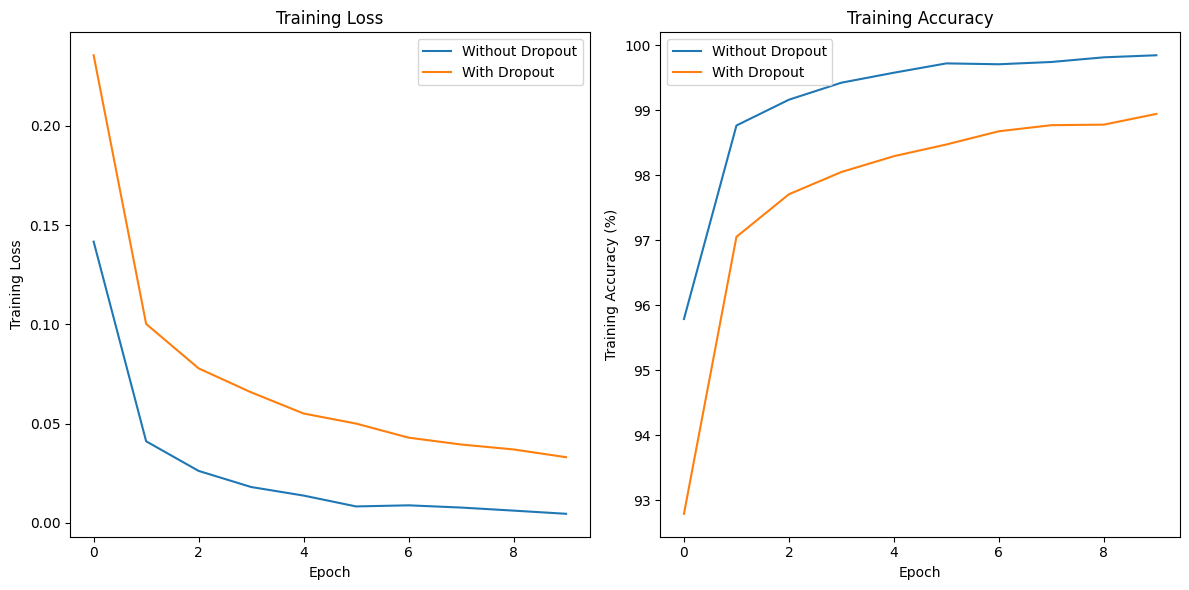

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self, dropout=False):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25) if dropout else nn.Identity()
        self.dropout2 = nn.Dropout2d(0.5) if dropout else nn.Identity()
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = dropout

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

def train_model(net, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    train_losses = []
    train_accuracies = []
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(100 * correct / total)
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}, Accuracy: {100 * correct / total:.2f}%')

    return train_losses, train_accuracies

def test_model(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

# Train and evaluate models
net_no_dropout = Net(dropout=False)
train_losses_no_dropout, train_accuracies_no_dropout = train_model(net_no_dropout)
test_accuracy_no_dropout = test_model(net_no_dropout)
print(f'Accuracy of the network without dropout on the 10,000 test images: {test_accuracy_no_dropout}%')

net_with_dropout = Net(dropout=True)
train_losses_with_dropout, train_accuracies_with_dropout = train_model(net_with_dropout)
test_accuracy_with_dropout = test_model(net_with_dropout)
print(f'Accuracy of the network with dropout on the 10,000 test images: {test_accuracy_with_dropout}%')

# Plotting the training losses and accuracies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses_no_dropout, label='Without Dropout')
plt.plot(train_losses_with_dropout, label='With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_no_dropout, label='Without Dropout')
plt.plot(train_accuracies_with_dropout, label='With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.title('Training Accuracy')

plt.tight_layout()
plt.savefig('training_results.png')  # Save the figure
plt.show()

# Save the test accuracies
with open('test_accuracies.txt', 'w') as f:
    f.write(f'Accuracy without Dropout: {test_accuracy_no_dropout:.2f}%\n')
    f.write(f'Accuracy with Dropout: {test_accuracy_with_dropout:.2f}%\n')


Files already downloaded and verified
Files already downloaded and verified
Training model with Global Average Pooling=True and BatchNorm=False...
Epoch 1, Loss: 1.8085, Accuracy: 32.50%
Accuracy of the network on the 10000 test images: 38.81%
Epoch 2, Loss: 1.5792, Accuracy: 42.56%
Accuracy of the network on the 10000 test images: 45.83%
Epoch 3, Loss: 1.4695, Accuracy: 47.29%
Accuracy of the network on the 10000 test images: 47.86%
Epoch 4, Loss: 1.4047, Accuracy: 49.58%
Accuracy of the network on the 10000 test images: 50.88%
Epoch 5, Loss: 1.3542, Accuracy: 51.80%
Accuracy of the network on the 10000 test images: 52.04%
Epoch 6, Loss: 1.3178, Accuracy: 53.37%
Accuracy of the network on the 10000 test images: 52.92%
Epoch 7, Loss: 1.2887, Accuracy: 54.49%
Accuracy of the network on the 10000 test images: 54.14%
Epoch 8, Loss: 1.2645, Accuracy: 55.21%
Accuracy of the network on the 10000 test images: 55.34%
Epoch 9, Loss: 1.2416, Accuracy: 56.08%
Accuracy of the network on the 10000 

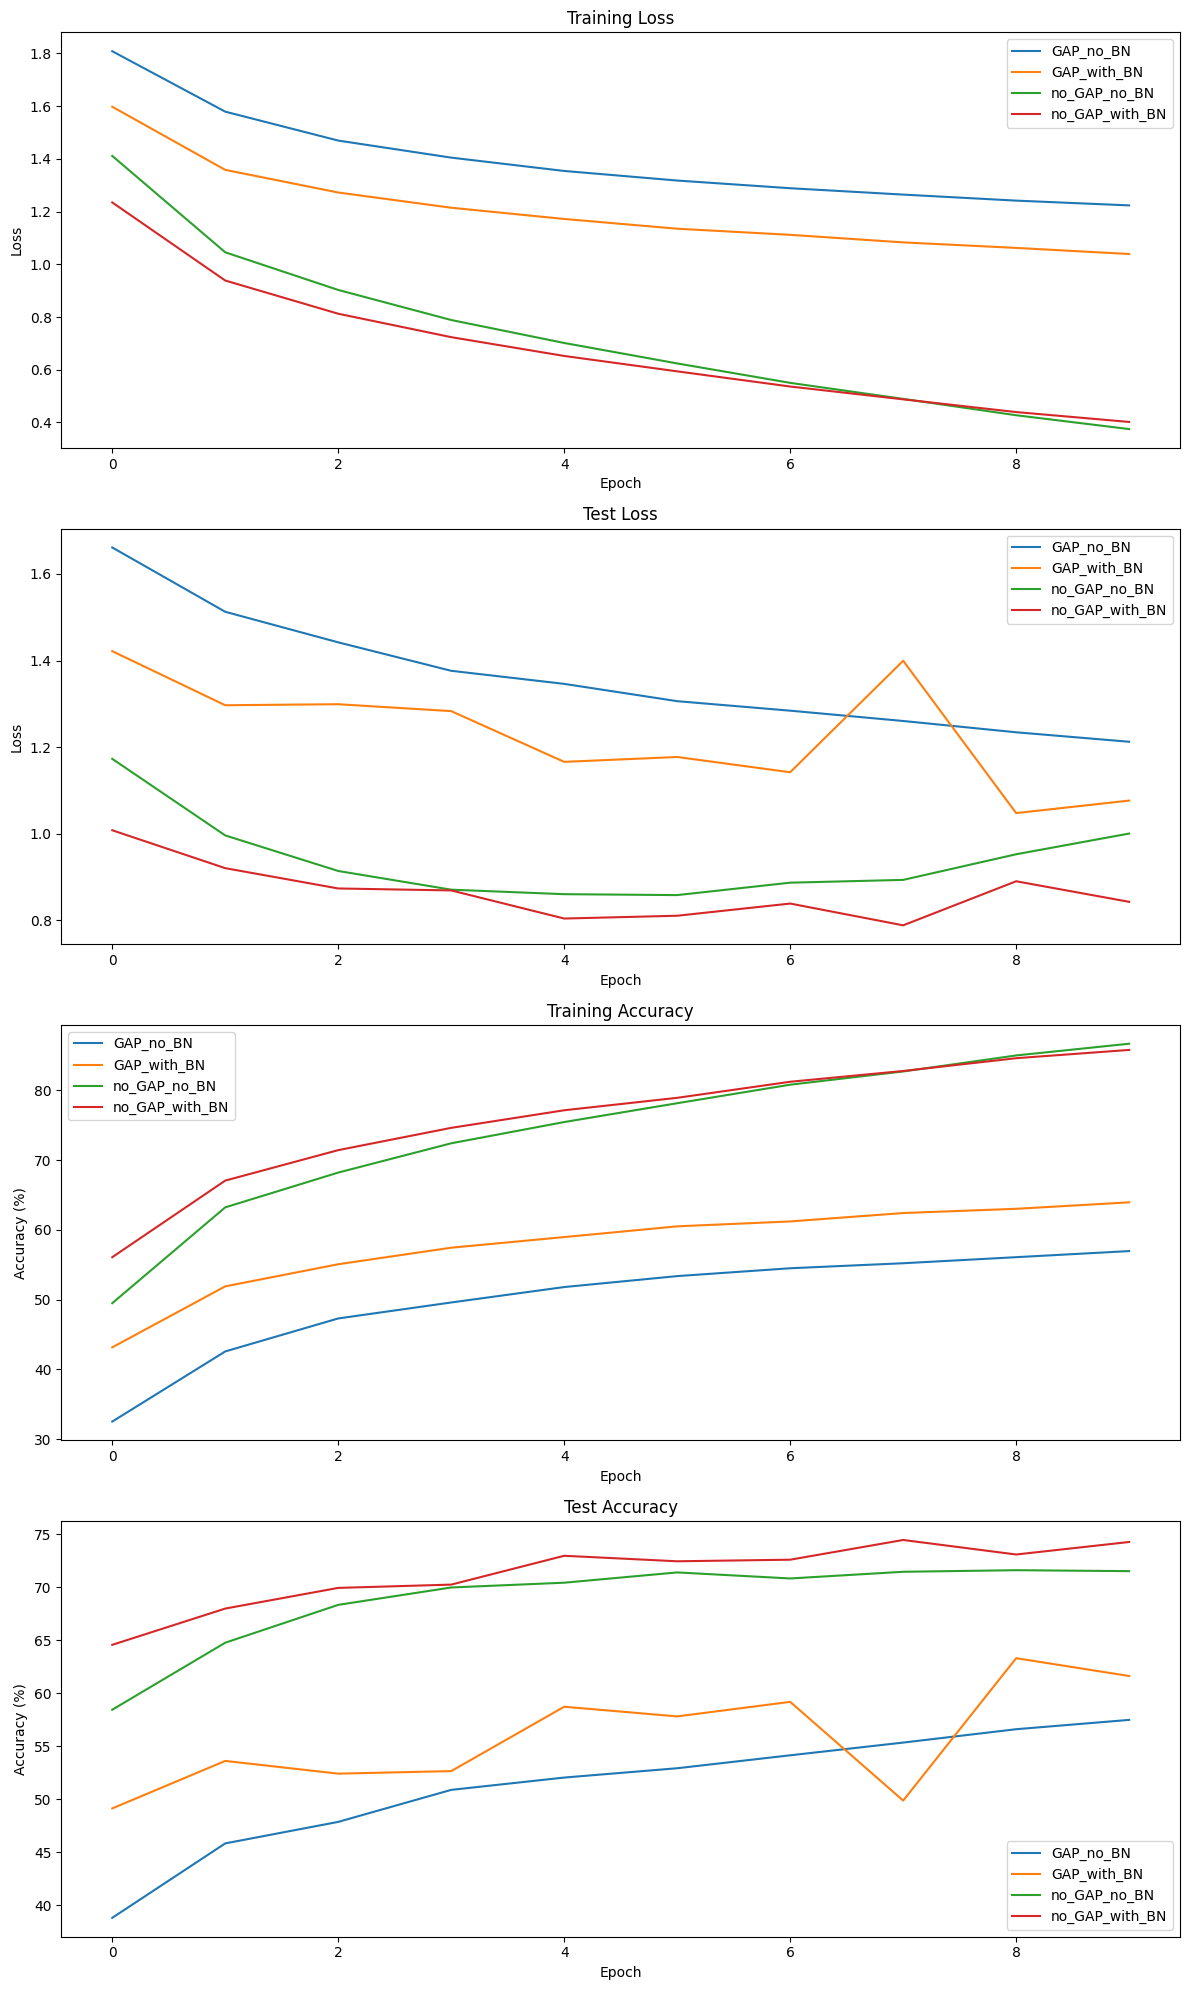

GAP_no_BN - Final Test Accuracy: 57.48%
GAP_with_BN - Final Test Accuracy: 61.62%
no_GAP_no_BN - Final Test Accuracy: 71.51%
no_GAP_with_BN - Final Test Accuracy: 74.26%


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로딩 및 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# CNN 모델 정의
class Net(nn.Module):
    def __init__(self, use_global_avg_pooling=False, use_batchnorm=False):
        super(Net, self).__init__()
        self.use_global_avg_pooling = use_global_avg_pooling
        self.use_batchnorm = use_batchnorm
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)

        if use_batchnorm:
            self.bn1 = nn.BatchNorm2d(32)
            self.bn2 = nn.BatchNorm2d(64)

        if use_global_avg_pooling:
            self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
            self.fc1 = nn.Linear(64, 10)
        else:
            self.fc1 = nn.Linear(64 * 6 * 6, 128)
            self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)

        if self.use_global_avg_pooling:
            x = self.global_avg_pool(x)
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
        else:
            x = x.view(-1, 64 * 6 * 6)
            x = nn.functional.relu(self.fc1(x))
            x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# 모델 학습 및 평가 함수
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, num_epochs=10):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(trainloader)
        train_losses.append(avg_loss)
        train_accuracies.append(100 * correct / total)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {100 * correct / total:.2f}%')

        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(testloader))
        test_accuracies.append(100 * correct / total)
        print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

    return train_losses, train_accuracies, test_losses, test_accuracies

# Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델 설정 및 학습
def run_experiment(use_gavg, use_bn):
    model = Net(use_global_avg_pooling=use_gavg, use_batchnorm=use_bn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    print(f"Training model with Global Average Pooling={use_gavg} and BatchNorm={use_bn}...")
    return train_and_evaluate(model, trainloader, testloader, optimizer, criterion)

# 네 가지 경우에 대한 실험 실행
results = {
    "GAP_no_BN": run_experiment(use_gavg=True, use_bn=False),
    "GAP_with_BN": run_experiment(use_gavg=True, use_bn=True),
    "no_GAP_no_BN": run_experiment(use_gavg=False, use_bn=False),
    "no_GAP_with_BN": run_experiment(use_gavg=False, use_bn=True),
}

# 결과 시각화
plt.figure(figsize=(12, 20))

# 학습 손실 시각화
plt.subplot(4, 1, 1)
for label, (train_losses, train_accuracies, test_losses, test_accuracies) in results.items():
    plt.plot(train_losses, label=label)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 테스트 손실 시각화
plt.subplot(4, 1, 2)
for label, (train_losses, train_accuracies, test_losses, test_accuracies) in results.items():
    plt.plot(test_losses, label=label)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 학습 정확도 시각화
plt.subplot(4, 1, 3)
for label, (train_losses, train_accuracies, test_losses, test_accuracies) in results.items():
    plt.plot(train_accuracies, label=label)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# 테스트 정확도 시각화
plt.subplot(4, 1, 4)
for label, (train_losses, train_accuracies, test_losses, test_accuracies) in results.items():
    plt.plot(test_accuracies, label=label)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.savefig('batchnorm_gap_comparison.png')
plt.show()

# 결과 출력
for label, (train_losses, train_accuracies, test_losses, test_accuracies) in results.items():
    print(f"{label} - Final Test Accuracy: {test_accuracies[-1]:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Training model with option: fixed_all...
Epoch 1, Loss: 0.8275
Accuracy of the network on the 10000 test images: 78.83%
Epoch 2, Loss: 0.6150
Accuracy of the network on the 10000 test images: 79.58%
Epoch 3, Loss: 0.5875
Accuracy of the network on the 10000 test images: 79.74%
Epoch 4, Loss: 0.5773
Accuracy of the network on the 10000 test images: 80.33%
Epoch 5, Loss: 0.5672
Accuracy of the network on the 10000 test images: 80.24%
Epoch 6, Loss: 0.5616
Accuracy of the network on the 10000 test images: 80.16%
Epoch 7, Loss: 0.5528
Accuracy of the network on the 10000 test images: 80.19%
Epoch 8, Loss: 0.5536
Accuracy of the network on the 10000 test images: 80.35%
Epoch 9, Loss: 0.5479
Accuracy of the network on the 10000 test images: 79.46%
Epoch 10, Loss: 0.5460
Accuracy of the network on the 10000 test images: 80.39%
Epoch 11, Loss: 0.5445
Accuracy of the network on the 10000 test images: 80.77%
Epoch 12, Lo

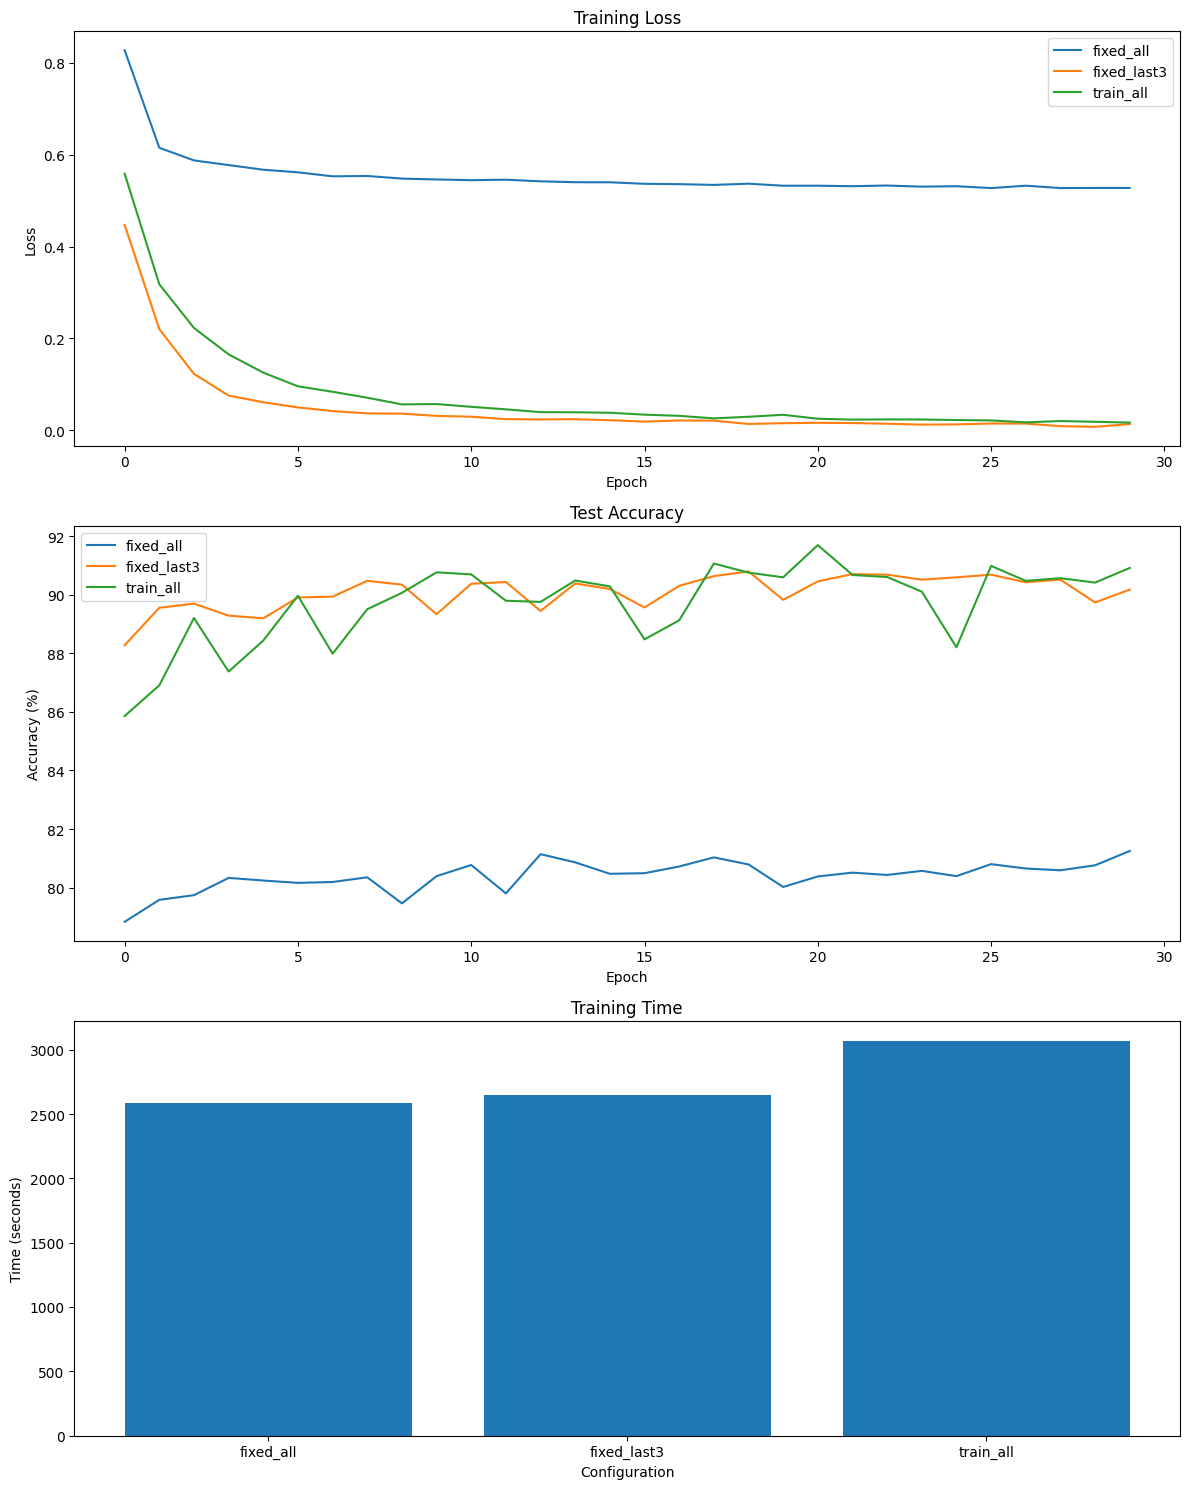

fixed_all - Final Test Accuracy: 81.25%, Training Time: 2588.62 seconds
fixed_last3 - Final Test Accuracy: 90.18%, Training Time: 2645.58 seconds
train_all - Final Test Accuracy: 90.92%, Training Time: 3067.91 seconds


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import numpy as np

# CIFAR-10 데이터셋 로딩 및 변환
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# ResNet18 모델 정의 및 파라미터 고정 설정 함수
def get_resnet18_model(option):
    model = models.resnet18(pretrained=True)

    if option == 'fixed_all':
        for param in model.parameters():
            param.requires_grad = False
        model.fc = nn.Linear(model.fc.in_features, 10)

    elif option == 'fixed_last3':
        for name, param in model.named_parameters():
            if 'layer4' not in name and 'fc' not in name:
                param.requires_grad = False
        model.fc = nn.Linear(model.fc.in_features, 10)

    elif option == 'train_all':
        model.fc = nn.Linear(model.fc.in_features, 10)

    return model

# 모델 학습 및 평가 함수
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, num_epochs=30):
    train_losses = []
    test_accuracies = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        train_losses.append(avg_loss)
        print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

        # 테스트 정확도 측정
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

    training_time = time.time() - start_time
    return train_losses, test_accuracies, training_time

# Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델 설정 및 학습
options = ['fixed_all', 'fixed_last3', 'train_all']
results = {}

for option in options:
    model = get_resnet18_model(option).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    print(f"Training model with option: {option}...")
    train_losses, test_accuracies, training_time = train_and_evaluate(model, trainloader, testloader, optimizer, criterion)
    results[option] = (train_losses, test_accuracies, training_time)

# 결과 시각화
plt.figure(figsize=(12, 15))

# 학습 손실 시각화
plt.subplot(3, 1, 1)
for label, (train_losses, test_accuracies, training_time) in results.items():
    plt.plot(train_losses, label=label)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 테스트 정확도 시각화
plt.subplot(3, 1, 2)
for label, (train_losses, test_accuracies, training_time) in results.items():
    plt.plot(test_accuracies, label=label)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# 학습 시간 시각화
plt.subplot(3, 1, 3)
training_times = [training_time for _, _, training_time in results.values()]
plt.bar(results.keys(), training_times)
plt.title('Training Time')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.savefig('transfer_learning_comparison.png')
plt.show()

# 결과 출력
for label, (train_losses, test_accuracies, training_time) in results.items():
    print(f"{label} - Final Test Accuracy: {test_accuracies[-1]:.2f}%, Training Time: {training_time:.2f} seconds")
